In [1]:
import os
import sys
import json
import re
import nltk
import plotly
import operator
import string
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plotly.tools.set_credentials_file(
    username='moamenibrahim', api_key='mV0gCyPj5sIKGQqC78zC')

In [2]:
data  = pd.read_csv('scraped_data/processed.csv')

In [3]:
porter = nltk.stem.porter.PorterStemmer()

In [4]:
df = data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 11 columns):
user         2369 non-null object
thread       2369 non-null object
time         2369 non-null object
text         2369 non-null object
tidy_text    2365 non-null object
hyponyms     2369 non-null object
pos          2369 non-null object
ner          2369 non-null object
topic        2369 non-null object
names        2369 non-null object
sentiment    2365 non-null object
dtypes: object(11)
memory usage: 203.7+ KB


In [5]:
df['main_thread']=df['time'].apply(lambda x: False if 'in response to' in x else True)

In [6]:
thread_divided = tuple(df.groupby(data['thread']))

In [7]:
tuple(df.groupby(data['thread']))

((' Counselling courses to help people with cancer?',
             user                                            thread  \
  682  andydorro1   Counselling courses to help people with cancer?   
  683  andydorro1   Counselling courses to help people with cancer?   
  684  andydorro1   Counselling courses to help people with cancer?   
  754  andydorro1   Counselling courses to help people with cancer?   
  755  andydorro1   Counselling courses to help people with cancer?   
  756  andydorro1   Counselling courses to help people with cancer?   
  
                                                   time  \
  682                                  2 Jun 2018 19:40   
  683        5 Jun 2018 16:05 in response to andydorro1   
  684  5 Jun 2018 17:22 in response to CRUK Nurse Vanda   
  754                                  2 Jun 2018 19:40   
  755        5 Jun 2018 16:05 in response to andydorro1   
  756  5 Jun 2018 17:22 in response to CRUK Nurse Vanda   
  
                              

In [8]:
df.head()

,user,thread,time,text,tidy_text,hyponyms,pos,ner,topic,names,sentiment,main_thread
0,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 09:41,Hi y'all.As I posted before I'm in this forum ...,post befor thi forum becaus boyfriend stage co...,{'Hyponyms': []},"[('post', 'NN'), ('befor', 'FW'), ('thi', 'FW'...","[('post', 'O'), ('befor', 'O'), ('thi', 'O'), ...","['nerv', 'shrank', 'never', 'oncologist', 'onl...",[],"('3', '-4')",True
1,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 09:53 in response to lonelygirl,"Hi Lonelygirl, I'm soo sorry for what you are ...",lonelygirl sorri what go through thi just aw y...,{'Hyponyms': []},"[('lonelygirl', 'NN'), ('sorri', 'NNS'), ('wha...","[('lonelygirl', 'O'), ('sorri', 'O'), ('what',...","['love', 'alon', 'massiv', 'partner', 'portug'...",[],"('3', '-2')",False
2,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 10:02 in response to lonelygirl,Hello again; I remembered the discussions we h...,hello again rememb discuss month that thing go...,{'Hyponyms': []},"[('hello', 'UH'), ('again', 'RB'), ('rememb', ...","[('hello', 'O'), ('again', 'O'), ('rememb', 'O...","['take', 'sourc', 'some', 'situat', 'rememb', ...",[],"('3', '-3')",False
3,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 10:43 in response to RosieApples,Hi @RosieApples ‍Thank you for replying. I don...,thank repli think there support group here see...,{'Hyponyms': []},"[('thank', 'VB'), ('repli', 'NNS'), ('think', ...","[('thank', 'O'), ('repli', 'O'), ('think', 'O'...","['take', 'well', 'which', 'would', 'through', ...",[],"('3', '-4')",False
4,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 10:57 in response to Annieliz,Hi @Annieliz ‍ I'm happy that you reply to me ...,happi that repli onc again rememb that make fe...,{'Hyponyms': []},"[('happi', 'NNS'), ('that', 'WDT'), ('repli', ...","[('happi', 'O'), ('that', 'O'), ('repli', 'O')...","['recent', 'person', 'slow', 'patient', 'pain'...",[],"('3', '-4')",False


In [9]:
re.findall(r'[\d]{1,2} [ADFJMNOS]\w* [\d]{4}', df['time'][0])

['6 Feb 2019']

In [10]:
from dateutil.parser import parse
##'%m/%d/%Y %I:%M%p'
df['time_adjusted']=df['time'].apply(lambda x: re.findall(r'[\d]{1,2} [ADFJMNOS]\w* [\d]{4}',x)[0])    

In [108]:
df.head()

,user,thread,time,text,tidy_text,hyponyms,pos,ner,topic,names,sentiment,main_thread,time_adjusted
0,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 09:41,Hi y'all.As I posted before I'm in this forum ...,post befor thi forum becaus boyfriend stage co...,{'Hyponyms': []},"[('post', 'NN'), ('befor', 'FW'), ('thi', 'FW'...","[('post', 'O'), ('befor', 'O'), ('thi', 'O'), ...","['nerv', 'shrank', 'never', 'oncologist', 'onl...",[],"('3', '-4')",True,6 Feb 2019
1,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 09:53 in response to lonelygirl,"Hi Lonelygirl, I'm soo sorry for what you are ...",lonelygirl sorri what go through thi just aw y...,{'Hyponyms': []},"[('lonelygirl', 'NN'), ('sorri', 'NNS'), ('wha...","[('lonelygirl', 'O'), ('sorri', 'O'), ('what',...","['love', 'alon', 'massiv', 'partner', 'portug'...",[],"('3', '-2')",False,6 Feb 2019
2,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 10:02 in response to lonelygirl,Hello again; I remembered the discussions we h...,hello again rememb discuss month that thing go...,{'Hyponyms': []},"[('hello', 'UH'), ('again', 'RB'), ('rememb', ...","[('hello', 'O'), ('again', 'O'), ('rememb', 'O...","['take', 'sourc', 'some', 'situat', 'rememb', ...",[],"('3', '-3')",False,6 Feb 2019
3,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 10:43 in response to RosieApples,Hi @RosieApples ‍Thank you for replying. I don...,thank repli think there support group here see...,{'Hyponyms': []},"[('thank', 'VB'), ('repli', 'NNS'), ('think', ...","[('thank', 'O'), ('repli', 'O'), ('think', 'O'...","['take', 'well', 'which', 'would', 'through', ...",[],"('3', '-4')",False,6 Feb 2019
4,lonelygirl,Boyfriend with stage 4 colon cancer with liver...,6 Feb 2019 10:57 in response to Annieliz,Hi @Annieliz ‍ I'm happy that you reply to me ...,happi that repli onc again rememb that make fe...,{'Hyponyms': []},"[('happi', 'NNS'), ('that', 'WDT'), ('repli', ...","[('happi', 'O'), ('that', 'O'), ('repli', 'O')...","['recent', 'person', 'slow', 'patient', 'pain'...",[],"('3', '-4')",False,6 Feb 2019


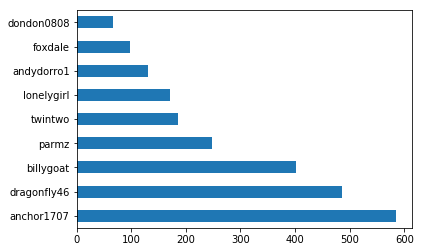

In [14]:
df['user'].value_counts().plot(kind='barh')

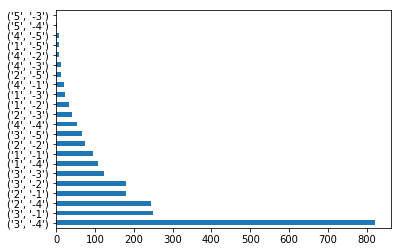

In [15]:
df['sentiment'].value_counts().plot(kind='barh')

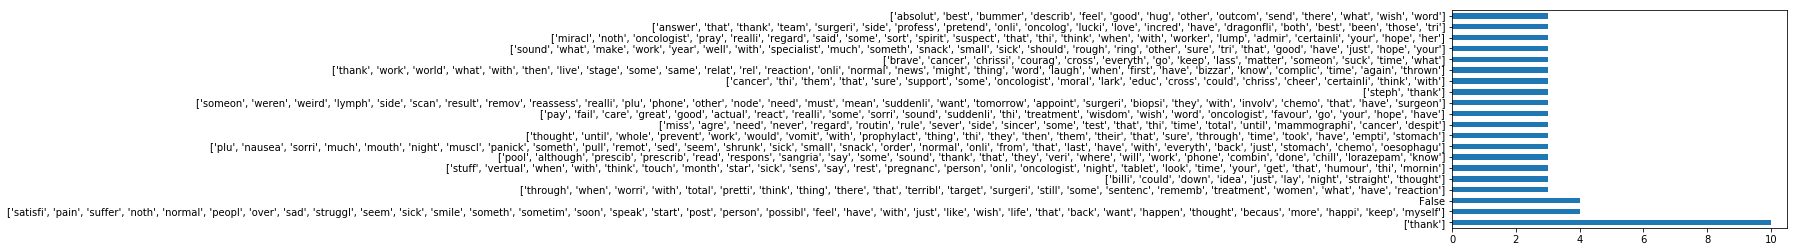

In [16]:
df['topic'].value_counts()[:20].plot(kind='barh')

In [94]:
import ast
from collections import Counter

In [122]:
topic_items=[]

def add_to_dict(string_list):
    try:
        string_list = ast.literal_eval(string_list)
        string_list = [n.strip() for n in string_list]
        for item in string_list:
            topic_items.append(item)
    except TypeError:
        pass
        
df['topic'].apply(lambda x: add_to_dict(x));
staged_topics = Counter(topic_items)
staged_topics = {x : staged_topics[x] for x in staged_topics if len(x) >= 3}
staged_topics = sorted(staged_topics.items(), key=operator.itemgetter(1), reverse=True)

In [133]:
staged_topics

[('that', 1128),
 ('have', 1088),
 ('with', 928),
 ('thi', 761),
 ('your', 700),
 ('will', 595),
 ('they', 569),
 ('cancer', 509),
 ('what', 487),
 ('thank', 481),
 ('some', 471),
 ('there', 446),
 ('realli', 417),
 ('just', 394),
 ('sorri', 386),
 ('time', 370),
 ('know', 359),
 ('take', 354),
 ('post', 338),
 ('week', 329),
 ('when', 322),
 ('think', 312),
 ('about', 306),
 ('feel', 304),
 ('other', 297),
 ('start', 297),
 ('well', 292),
 ('been', 291),
 ('still', 286),
 ('treatment', 286),
 ('veri', 283),
 ('said', 282),
 ('help', 276),
 ('support', 262),
 ('hope', 262),
 ('good', 262),
 ('much', 257),
 ('result', 257),
 ('peopl', 256),
 ('through', 250),
 ('need', 248),
 ('would', 248),
 ('like', 246),
 ('want', 246),
 ('read', 237),
 ('then', 237),
 ('more', 236),
 ('right', 226),
 ('wish', 226),
 ('sure', 225),
 ('side', 219),
 ('onli', 218),
 ('posit', 215),
 ('thing', 213),
 ('same', 210),
 ('year', 210),
 ('which', 208),
 ('pleas', 197),
 ('scan', 192),
 ('seem', 189),
 ('wait

In [131]:
sentiment_items=[]

def add_to_sentiment(string_list):
    try:
        string_list = ast.literal_eval(string_list)
        string_list = [n.strip() for n in string_list]
        for item in string_list:
            sentiment_items.append(item)
    except ValueError:
        pass
        
df['sentiment'].apply(lambda x: add_to_sentiment(x));
staged_sentiment = Counter(sentiment_items)
staged_sentiment = {x : staged_sentiment[x] for x in staged_sentiment if len(x) >= 1}
staged_sentiment = sorted(staged_sentiment.items(), key=operator.itemgetter(1), reverse=True)

In [132]:
staged_sentiment

[('3', 1440),
 ('-4', 1230),
 ('2', 553),
 ('-1', 544),
 ('-2', 295),
 ('1', 268),
 ('-3', 201),
 ('4', 101),
 ('-5', 95),
 ('5', 3)]

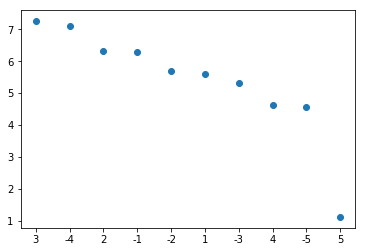

In [135]:
from math import log

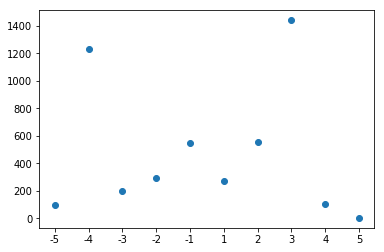

In [144]:
testList = [(elem1, elem2) for elem1, elem2 in staged_sentiment]
testList = sorted(testList, key=lambda x: int(x[0]))
zip(*testList)
plt.scatter(*zip(*testList))
plt.show()

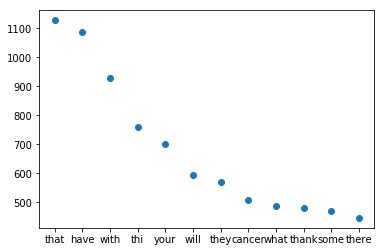

In [152]:
testList2 = [(elem1, elem2) for elem1, elem2 in staged_topics][:12]
zip(*testList2)
plt.scatter(*zip(*testList2))
plt.show()